<a href="https://colab.research.google.com/github/Zkeera/machine-learning-dasar/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Mohammad_Taqi_Ashiddiqi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dataset Abalone berisi informasi tentang spesies keong laut abalone, yang digunakan untuk mengklasifikasikan usia abalone berdasarkan sejumlah fitur fisiknya. Dataset ini dapat digunakan untuk berbagai analisis, termasuk klasifikasi dan clustering, karena terdapat banyak fitur numerik yang dapat digunakan untuk mengelompokkan data atau memprediksi target tertentu.

Fitur-fitur dalam dataset ini meliputi:

- Sex: Jenis kelamin abalone (M = Male, F = Female, I = Infant).

- Length: Panjang abalone (dalam milimeter).

- Diameter: Diameter abalone (dalam milimeter).

- Height: Tinggi abalone (dalam milimeter).

- WholeWeight: Berat keseluruhan abalone (dalam gram).

- ShuckedWeight: Berat daging abalone (dalam gram).

- VisceraWeight: Berat viskera abalone (dalam gram).

- ShellWeight: Berat cangkang abalone (dalam gram).


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
from joblib import dump

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

In [65]:
url = "https://raw.githubusercontent.com/Zkeera/machine-learning-dasar/refs/heads/main/dataset/abalone.csv"
df = pd.read_csv(url)

In [66]:
df.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [67]:
print("Nama kolom dalam dataset:")
print(df.columns)

Nama kolom dalam dataset:
Index(['M', '0.455', '0.365', '0.095', '0.514', '0.2245', '0.101', '0.15',
       '15'],
      dtype='object')


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M       4176 non-null   object 
 1   0.455   4176 non-null   float64
 2   0.365   4176 non-null   float64
 3   0.095   4176 non-null   float64
 4   0.514   4176 non-null   float64
 5   0.2245  4176 non-null   float64
 6   0.101   4176 non-null   float64
 7   0.15    4176 non-null   float64
 8   15      4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [69]:
df.describe()

,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


In [70]:
# Menetapkan nama kolom yang sesuai berdasarkan urutan kolom
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Age']

# Menampilkan nama kolom untuk memastikan perubahan
print(df.columns)


Index(['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight',
       'VisceraWeight', 'ShellWeight', 'Age'],
      dtype='object')


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [71]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)

In [ ]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `pd.get_dummies()` atau `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [72]:
df.isnull().sum()

,0
Sex,0
Length,0
Diameter,0
Height,0
WholeWeight,0
ShuckedWeight,0
VisceraWeight,0
ShellWeight,0
Age,0


In [73]:
df.duplicated().sum()

np.int64(0)

In [74]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [75]:
df_clean = df.drop('Sex', axis=1)

In [76]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_clean)

In [77]:
df_scaled[:5]

array([[0.37162162, 0.35294118, 0.07964602, 0.07915707, 0.06624075,
        0.06319947, 0.06826109, 0.21428571],
       [0.61486486, 0.61344538, 0.11946903, 0.23906499, 0.17182246,
        0.18564845, 0.2077728 , 0.28571429],
       [0.49324324, 0.5210084 , 0.11061947, 0.18204356, 0.14425017,
        0.14944042, 0.15296462, 0.32142857],
       [0.34459459, 0.33613445, 0.07079646, 0.07189658, 0.0595158 ,
        0.05134957, 0.0533134 , 0.21428571],
       [0.47297297, 0.41176471, 0.0840708 , 0.12378254, 0.09414929,
        0.10138249, 0.1180867 , 0.25      ]])

In [78]:
from sklearn.preprocessing import LabelEncoder

In [79]:
label_encoder = LabelEncoder()

In [80]:
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [81]:
print(df.head())

   Sex  Length  Diameter  Height  WholeWeight  ShuckedWeight  VisceraWeight  \
0    2   0.350     0.265   0.090       0.2255         0.0995         0.0485   
1    0   0.530     0.420   0.135       0.6770         0.2565         0.1415   
2    2   0.440     0.365   0.125       0.5160         0.2155         0.1140   
3    1   0.330     0.255   0.080       0.2050         0.0895         0.0395   
4    1   0.425     0.300   0.095       0.3515         0.1410         0.0775   

   ShellWeight  Age  
0        0.070    7  
1        0.210    9  
2        0.155   10  
3        0.055    7  
4        0.120    8  


In [82]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [83]:
df_encoded.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Age
0,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).

In [ ]:
# Menghapus data duplikat menggunakan drop_duplicates().

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

In [ ]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder atau get_dummies.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
2. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
3. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [39]:
pd.DataFrame(df_scaled).describe()

,0,1,2,3,4,5,6,7
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000
mean,0.606768,0.593095,0.123475,0.292834,0.241022,0.237146,0.236524,0.319017
std,0.162301,0.166806,0.037015,0.173693,0.149280,0.144332,0.138727,0.115129
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.506757,0.495798,0.101770,0.155658,0.124412,0.122284,0.128052,0.250000
50%,0.635135,0.621849,0.123894,0.282539,0.225286,0.224490,0.231689,0.285714
75%,0.729730,0.714286,0.146018,0.407739,0.336920,0.332456,0.326358,0.357143
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [43]:
model = KMeans()

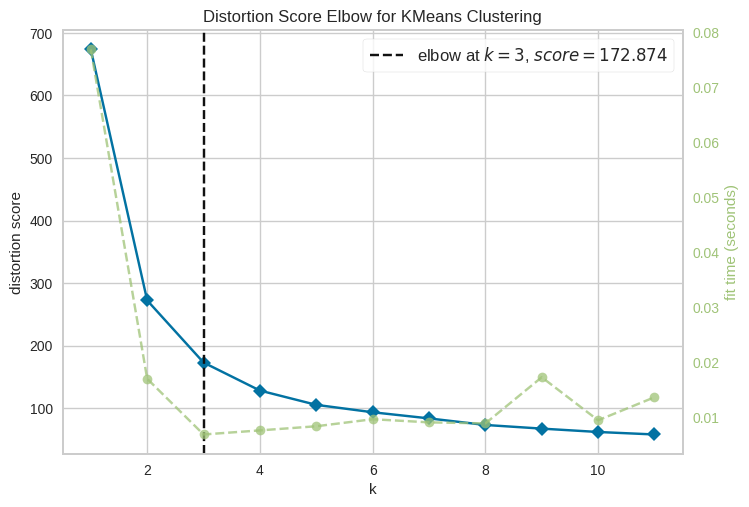

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(df_scaled)  # Fit model pada data yang telah diproses (df_scaled)
visualizer.show()

In [45]:
optimal_k = 4

In [46]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

In [47]:
df['Cluster'] = kmeans.fit_predict(df_scaled)

Jalankan cell code ini untuk menyimpan model kamu.

In [48]:
import joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menghitung dan menampilkan nilai Silhouette Score.

In [ ]:
# Membuat visualisasi hasil clustering

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Membangun model menggunakan PCA.

In [ ]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")

# **5. Interpretasi Cluster**

In [52]:
# Menampilkan analisis deskriptif untuk fitur numerik
numerical_stats = df.describe().transpose()

# Menambahkan modus (mode) pada analisis deskriptif numerik
numerical_stats['mode'] = df.mode().iloc[0]

# Menampilkan hasil analisis deskriptif untuk fitur numerik
print("Analisis Deskriptif untuk Fitur Numerik:")
print(numerical_stats[['mean', 'min', 'max', 'mode']])

Analisis Deskriptif untuk Fitur Numerik:
                   mean     min      max    mode
Sex            1.052682  0.0000   2.0000  2.0000
Length         0.524009  0.0750   0.8150  0.5500
Diameter       0.407892  0.0550   0.6500  0.4500
Height         0.139527  0.0000   1.1300  0.1500
WholeWeight    0.828818  0.0020   2.8255  0.2225
ShuckedWeight  0.359400  0.0010   1.4880  0.1750
VisceraWeight  0.180613  0.0005   0.7600  0.1715
ShellWeight    0.238852  0.0015   1.0050  0.2750
Age            9.932471  1.0000  29.0000  9.0000
Cluster        1.171216  0.0000   3.0000  1.0000


In [53]:
# Menampilkan analisis deskriptif untuk fitur kategorikal (misalnya, 'Sex')
categorical_stats = df['Sex'].describe()

# Menampilkan hasil analisis deskriptif untuk fitur kategorikal
print("Analisis Deskriptif untuk Fitur Kategorikal:")
print(categorical_stats)

Analisis Deskriptif untuk Fitur Kategorikal:
count    4176.000000
mean        1.052682
std         0.822208
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: Sex, dtype: float64


In [54]:
# Menambahkan agregasi lain seperti median, variance, skewness
numerical_stats['median'] = df.median()
numerical_stats['variance'] = df.var()
numerical_stats['skewness'] = df.skew()

# Menampilkan hasil agregasi tambahan untuk fitur numerik
print("Agregasi Tambahan untuk Fitur Numerik:")
print(numerical_stats[['mean', 'min', 'max', 'mode', 'median', 'variance', 'skewness']])


Agregasi Tambahan untuk Fitur Numerik:
                   mean     min      max    mode   median   variance  skewness
Sex            1.052682  0.0000   2.0000  2.0000  1.00000   0.676026 -0.097729
Length         0.524009  0.0750   0.8150  0.5500  0.54500   0.014425 -0.640240
Diameter       0.407892  0.0550   0.6500  0.4500  0.42500   0.009850 -0.609457
Height         0.139527  0.0000   1.1300  0.1500  0.14000   0.001749  3.129241
WholeWeight    0.828818  0.0020   2.8255  0.2225  0.79975   0.240515  0.530576
ShuckedWeight  0.359400  0.0010   1.4880  0.1750  0.33600   0.049275  0.718724
VisceraWeight  0.180613  0.0005   0.7600  0.1715  0.17100   0.012017  0.591463
ShellWeight    0.238852  0.0015   1.0050  0.2750  0.23400   0.019380  0.620547
Age            9.932471  1.0000  29.0000  9.0000  9.00000  10.391606  1.115157
Cluster        1.171216  0.0000   3.0000  1.0000  1.00000   1.045887  0.450128


In [58]:
# Analisis statistik berdasarkan cluster
cluster_stats = df.groupby('Cluster').describe()

# Menampilkan statistik agregat berdasarkan cluster
print("Statistik Agregat Berdasarkan Cluster:")

# Mengakses statistik 'mean', 'min', dan 'max' dari level kedua dari multi-indeks
cluster_summary = cluster_stats.stack(level=0)[['mean', 'min', 'max']]

# Menampilkan hasil
print(cluster_summary)

Statistik Agregat Berdasarkan Cluster:
                            mean     min      max
Cluster                                          
0       Age             9.591190  6.0000  23.0000
        Diameter        0.380634  0.3000   0.4650
        Height          0.129107  0.0000   1.1300
        Length          0.491264  0.3800   0.5850
        Sex             1.034776  0.0000   2.0000
        ShellWeight     0.174447  0.0880   0.3800
        ShuckedWeight   0.250108  0.0680   0.4725
        VisceraWeight   0.127398  0.0345   0.2455
        WholeWeight     0.583847  0.1315   0.9810
1       Age            11.045703  6.0000  27.0000
        Diameter        0.467326  0.3650   0.5650
        Height          0.159638  0.0150   0.2500
        Length          0.595549  0.4850   0.7200
        Sex             1.055252  0.0000   2.0000
        ShellWeight     0.303543  0.1210   0.5800
        ShuckedWeight   0.461238  0.2370   0.8000
        VisceraWeight   0.231743  0.1120   0.4365
        Who

<ipython-input-58-834a7527badd>:8: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  cluster_summary = cluster_stats.stack(level=0)[['mean', 'min', 'max']]


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1.Cluster 0: (Abalone dengan Ukuran Kecil dan Berat Ringan)

- Rata-rata (mean) Age: 9.59 (9.59 tahun)

- Rata-rata (mean) Diameter: 0.38 (3.80 cm)

- Rata-rata (mean) Height: 0.13 (1.30 cm)

- Rata-rata (mean) Length: 0.49 (4.90 cm)

- Rata-rata (mean) Sex: 1.03 (Jenis Kelamin: 1 = Laki-laki, 0 = Perempuan)

- Rata-rata (mean) ShellWeight: 0.17 (170 gram)

- Rata-rata (mean) ShuckedWeight: 0.25 (250 gram)

- Rata-rata (mean) VisceraWeight: 0.13 (130 gram)

- Rata-rata (mean) WholeWeight: 0.58 (580 gram)

Analisis:
Cluster ini berisi abalone dengan ukuran fisik yang lebih kecil dan berat yang lebih ringan. Ciri khas dari cluster ini adalah abalone dengan panjang, diameter, dan berat yang relatif kecil. Mungkin ini adalah abalone yang lebih muda atau dalam tahap pertumbuhan awal. Umur rata-rata cluster ini adalah sekitar 9.59 tahun, yang menunjukkan bahwa abalone dalam kelompok ini masih dalam fase pertumbuhan. Jenis kelamin cenderung seimbang antara jantan dan betina, dengan Sex rata-rata sekitar 1.03 (lebih banyak jantan). Rekomendasi untuk abalone dalam cluster ini adalah memastikan mereka memiliki lingkungan yang mendukung pertumbuhan yang optimal agar dapat berkembang menjadi abalone yang lebih besar.

2.Cluster 1: (Abalone dengan Ukuran Sedang dan Berat Sedang)

- Rata-rata (mean) Age: 11.05 (11.05 tahun)

- Rata-rata (mean) Diameter: 0.47 (4.70 cm)

- Rata-rata (mean) Height: 0.16 (1.60 cm)

- Rata-rata (mean) Length: 0.60 (6.00 cm)

- Rata-rata (mean) Sex: 1.06 (Jenis Kelamin: 1 = Laki-laki, 0 = Perempuan)

- Rata-rata (mean) ShellWeight: 0.30 (300 gram)

- Rata-rata (mean) ShuckedWeight: 0.46 (460 gram)

- Rata-rata (mean) VisceraWeight: 0.23 (230 gram)

- Rata-rata (mean) WholeWeight: 1.06 (1,060 gram)

Analisis:
Cluster ini berisi abalone yang memiliki ukuran tubuh dan berat yang lebih besar dibandingkan dengan cluster sebelumnya, namun masih dalam kategori sedang. Umur rata-rata cluster ini adalah sekitar 11.05 tahun, yang menunjukkan abalone dalam cluster ini mungkin berada dalam fase dewasa awal. Abalone dalam cluster ini memiliki diameter, panjang, dan berat yang lebih besar, dengan WholeWeight sekitar 1.06 kg. Rekomendasi untuk cluster ini adalah mempertahankan kondisi yang mendukung pertumbuhan dan mempertimbangkan proses pemanenan yang optimal, karena abalone dalam cluster ini cukup besar untuk dipanen atau diproduksi untuk tujuan lainnya.

3.Cluster 2: (Abalone dengan Ukuran Kecil dan Berat Sangat Ringan)

- Rata-rata (mean) Age: 6.71 (6.71 tahun)

- Rata-rata (mean) Diameter: 0.25 (2.50 cm)

- Rata-rata (mean) Height: 0.08 (0.80 cm)

- Rata-rata (mean) Length: 0.34 (3.40 cm)

- Rata-rata (mean) Sex: 1.11 (Jenis Kelamin: 1 = Laki-laki, 0 = Perempuan)

- Rata-rata (mean) ShellWeight: 0.06 (60 gram)

- Rata-rata (mean) ShuckedWeight: 0.09 (90 gram)

- Rata-rata (mean) VisceraWeight: 0.04 (40 gram)

- Rata-rata (mean) WholeWeight: 0.20 (200 gram)

Analisis:
Cluster ini berisi abalone yang memiliki ukuran tubuh sangat kecil dan berat sangat ringan. Umur rata-rata abalone di cluster ini adalah 6.71 tahun, yang lebih muda dibandingkan dengan cluster lainnya. Abalone di cluster ini kemungkinan besar berada dalam fase pertumbuhan yang sangat awal. Meskipun begitu, abalone dalam cluster ini memiliki ukuran diameter, panjang, dan berat yang sangat kecil, dengan WholeWeight hanya sekitar 200 gram. Rekomendasi untuk cluster ini adalah memastikan lingkungan yang lebih baik agar dapat mendukung perkembangan mereka menuju ukuran yang lebih besar.

4.Cluster 3: (Abalone dengan Ukuran Besar dan Berat Tinggi)

- Rata-rata (mean) Age: 12.40 (12.40 tahun)

- Rata-rata (mean) Diameter: 0.54 (5.40 cm)

- Rata-rata (mean) Height: 0.19 (1.90 cm)

- Rata-rata (mean) Length: 0.68 (6.80 cm)

- Rata-rata (mean) Sex: 1.01 (Jenis Kelamin: 1 = Laki-laki, 0 = Perempuan)

- Rata-rata (mean) ShellWeight: 0.46 (460 gram)

- Rata-rata (mean) ShuckedWeight: 0.72 (720 gram)

- Rata-rata (mean) VisceraWeight: 0.36 (360 gram)

- Rata-rata (mean) WholeWeight: 1.66 (1,660 gram)

Analisis:
Cluster ini berisi abalone dengan ukuran yang sangat besar dan berat yang lebih tinggi dibandingkan dengan cluster lainnya. Umur rata-rata abalone dalam cluster ini adalah 12.40 tahun, yang menunjukkan bahwa mereka telah mencapai fase dewasa. Abalone dalam cluster ini memiliki panjang, diameter, dan berat yang sangat besar, dengan WholeWeight sekitar 1.66 kg. Rekomendasi untuk cluster ini adalah memaksimalkan proses budidaya dan memastikan kualitas pemeliharaan agar abalone dalam cluster ini tetap sehat dan siap untuk tahap reproduksi atau pemanenan.



# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [59]:
df.rename(columns={'Cluster': 'Target'}, inplace=True)

In [60]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)

In [62]:
from google.colab import files

In [63]:
df.to_csv('data_clustering.csv', index=False)
files.download('data_clustering.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# inverse dataset ke rentang normal

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [ ]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)